# Redes Multicapa para Regresión

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tqdm
from functions3 import *
import itertools
import sys

In [3]:
# import data from csv
data = pd.read_csv('/Users/maxi/Downloads/Actuales/ML/ML-TP2/datasets/Student_Performance_DEV.csv').drop(columns='idx')
data

,forecasted_performance,hs_sleep,hs_study,prev_scores,practice,extracurricular_activities
0,6.326605,6.560017,5.043475,4.958906,4,False
1,7.774666,6.459315,3.529156,9.601236,5,False
2,7.343601,6.487913,2.500939,6.390868,4,False
3,1.851852,10.126572,2.311390,4.000000,5,False
4,3.607081,8.093355,3.419712,4.857238,9,False
...,...,...,...,...,...,...
1395,5.010497,6.481511,2.531747,4.598361,3,False
1396,6.280722,6.056482,5.997887,4.408789,8,False
1397,5.492269,5.402522,5.867482,4.000000,5,False
1398,7.002018,6.425094,5.027055,5.284618,6,False


### a)
Implementar una red neuronal multicapa, que funcione para cualquier valor $L \ge 1$, y $M^{(l)} \ge 1$, así como el algoritmo de optimización de descenso por gradiente y backpropagation para optimizar los pesos de las unidades ocultas, asumiendo una “loss-function” que sea la suma de los errores cuadráticos.

In [4]:
# data = one_hot_encoding(data, 'extracurricular_activities')
data = data.astype({'extracurricular_activities': 'int'})

# add column with practice * prev_scores
data['practice_prev_scores'] = data['practice'] * data['prev_scores']

# add column with hs_study/hs_sleep
data['hs_study*hs_sleep'] = data['hs_study'] / data['hs_sleep']


X = data.drop(columns=['forecasted_performance'])
y = data['forecasted_performance'].values

train_data, test_data = train_test_split(data, test_size=0.2, seed=42)

X_train = train_data.drop(columns=['forecasted_performance'])
y_train = train_data['forecasted_performance'].values

X_test = test_data.drop(columns=['forecasted_performance'])
y_test = test_data['forecasted_performance'].values

X_train

,hs_sleep,hs_study,prev_scores,practice,extracurricular_activities,practice_prev_scores,hs_study*hs_sleep
0,7.512345,5.072058,8.775325,14,1,122.854554,0.675163
1,7.645378,5.266626,8.351701,6,1,50.110206,0.688864
2,7.096499,3.071855,8.498025,2,1,16.996050,0.432869
3,6.454375,3.299192,9.913947,9,0,89.225524,0.511156
4,7.731830,2.091205,4.052463,17,0,68.891872,0.270467
...,...,...,...,...,...,...,...
1115,8.401831,5.314130,4.808138,16,0,76.930210,0.632497
1116,6.644282,4.947815,5.392057,2,0,10.784113,0.744673
1117,7.629650,4.989611,6.980204,9,0,62.821840,0.653976
1118,8.681235,5.776701,8.484583,9,0,76.361246,0.665424


In [5]:
nn_1 = MLP(input_size=X_train.shape[1], layers=[X_train.shape[1], 25, 1], activations='default', verbose=False)

# Fit the MLP model to the training data
train_losses_1, test_losses_1 = nn_1.fit(training_data=list(zip(X_train.values, y_train)), 
                                    test_data=list(zip(X_test.values, y_test)), 
                                    max_epochs=200, 
                                    mini_batch_size=10, 
                                    alpha=1e-7,
                                    update_rule='single_example')


100%|██████████| 200/200 [00:12<00:00, 16.26it/s]


In [6]:
print(f"num layers: {nn_1.num_layers}")
print(f"layers: {nn_1.layers}")
print(f"activations: {nn_1.activations}")

num layers: 3
layers: [7, 25, 1]
activations: ['relu', 'relu', 'linear']


In [7]:
nn_2 = MLP(input_size=X_train.shape[1], layers=[X_train.shape[1], 5, 5, 1], verbose=False)

nn_2.activations
# Fit the MLP model to the training data
train_losses_2, test_losses_2 = nn_2.fit(training_data=list(zip(X_train.values, y_train)), 
                                    test_data=list(zip(X_test.values, y_test)), 
                                    max_epochs=200, 
                                    mini_batch_size=10, 
                                    alpha=1e-7,
                                    update_rule='single_example')

  0%|          | 1/200 [00:00<00:38,  5.14it/s]

100%|██████████| 200/200 [00:15<00:00, 12.76it/s]


In [8]:
nn_3 = MLP(input_size=X_train.shape[1], layers=[X_train.shape[1], 5, 7, 5, 1], verbose=False)

# Fit the MLP model to the training data
train_losses_3, test_losses_3 = nn_3.fit(training_data=list(zip(X_train.values, y_train)), 
                                    test_data=list(zip(X_test.values, y_test)), 
                                    max_epochs=200, 
                                    mini_batch_size=10, 
                                    alpha=1e-7,
                                    update_rule='single_example')

100%|██████████| 200/200 [00:19<00:00, 10.17it/s]


In [9]:
nn_4 = MLP(input_size=X_train.shape[1], layers=[X_train.shape[1], 1, 1], verbose=False)

# Fit the MLP model to the training data
train_losses_4, test_losses_4 = nn_4.fit(training_data=list(zip(X_train.values, y_train)), 
                                    test_data=list(zip(X_test.values, y_test)), 
                                    max_epochs=200, 
                                    mini_batch_size=10, 
                                    alpha=1e-7,
                                    update_rule='single_example')

  0%|          | 1/200 [00:00<00:20,  9.82it/s]

100%|██████████| 200/200 [00:11<00:00, 17.42it/s]


### b)
Implementar descenso por gradiente estocástico y graficar la evolución del error de entrenamiento en función de las  épocas.

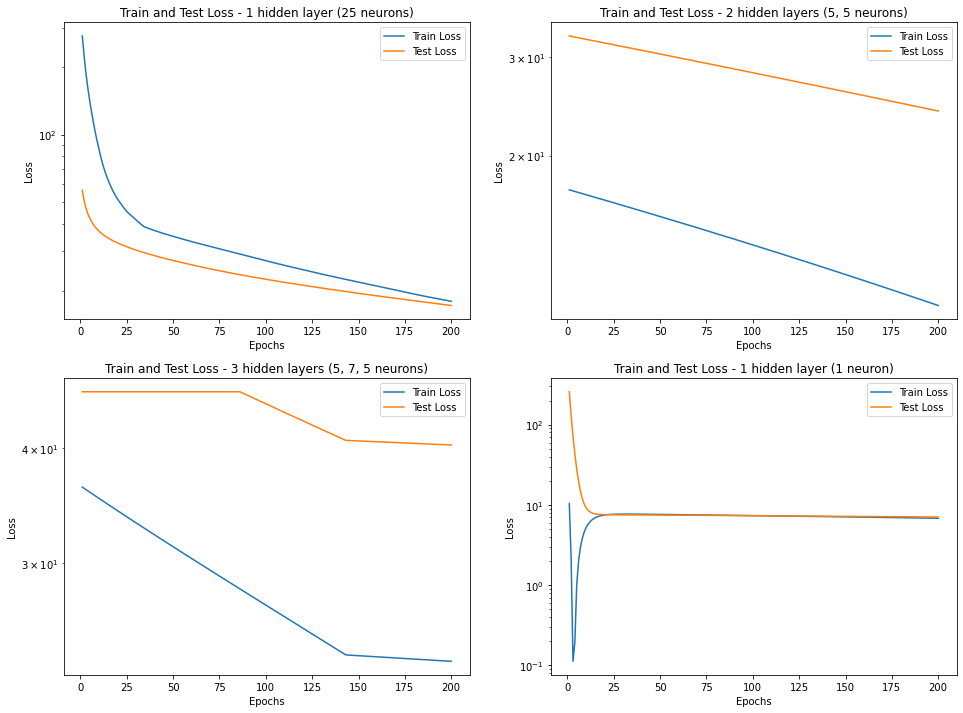

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
axs[0, 0].plot(range(1, len(train_losses_1) + 1), train_losses_1, label='Train Loss')
axs[0, 0].plot(range(1, len(test_losses_1) + 1), test_losses_1, label='Test Loss')
axs[0, 0].set_yscale('log')
axs[0, 0].set_xlabel('Epochs')
axs[0, 0].set_ylabel('Loss')
axs[0, 0].set_title('Train and Test Loss - 1 hidden layer (25 neurons)')
axs[0, 0].legend()

axs[0, 1].plot(range(1, len(train_losses_2) + 1), train_losses_2, label='Train Loss')
axs[0, 1].plot(range(1, len(test_losses_2) + 1), test_losses_2, label='Test Loss')
axs[0, 1].set_yscale('log')
axs[0, 1].set_xlabel('Epochs')
axs[0, 1].set_ylabel('Loss')
axs[0, 1].set_title('Train and Test Loss - 2 hidden layers (5, 5 neurons)')
axs[0, 1].legend()

axs[1, 0].plot(range(1, len(train_losses_3) + 1), train_losses_3, label='Train Loss')
axs[1, 0].plot(range(1, len(test_losses_3) + 1), test_losses_3, label='Test Loss')
axs[1, 0].set_yscale('log')
axs[1, 0].set_xlabel('Epochs')
axs[1, 0].set_ylabel('Loss')
axs[1, 0].set_title('Train and Test Loss - 3 hidden layers (5, 7, 5 neurons)')
axs[1, 0].legend()

axs[1, 1].plot(range(1, len(train_losses_4) + 1), train_losses_4, label='Train Loss')
axs[1, 1].plot(range(1, len(test_losses_4) + 1), test_losses_4, label='Test Loss')
axs[1, 1].set_yscale('log')
axs[1, 1].set_xlabel('Epochs')
axs[1, 1].set_ylabel('Loss')
axs[1, 1].set_title('Train and Test Loss - 1 hidden layer (1 neuron)')
axs[1, 1].legend()

plt.show()

In [11]:
for i in range(1, 5):
    nn = eval(f'nn_{i}')
    predictions = nn.predict(X_test)
    print(f'nn_{i} Predictions:')
    print("  Predictions  |   Test")
    for i in range(len(predictions)):
        print(predictions[i], y_test[i])
    print('\n')
predictions = nn_1.predict(X_test)

nn_1 Predictions:
  Predictions  |   Test
[0.2798738] 9.678152468405315
[4.20500583] 7.337679311836268
[3.64692146] 4.542551445452206
[3.96062855] 4.408466887658554
[10.57986653] 6.5918391130432274
[7.50602513] 7.126303113365252
[0.] 5.824865318066567
[7.46876665] 4.318271770712224
[9.80283023] 2.6946935959490674
[13.43195151] 4.621360632505932
[14.28785515] 6.289601307408167
[5.95811807] 6.659869395546703
[16.69832668] 8.050121380949898
[4.04735711] 1.851851851851852
[12.10983046] 7.629186838253545
[2.74584093] 3.628587783482679
[3.43744866] 6.490047212114392
[3.3858135] 10.0
[6.34629625] 7.926128337307125
[9.27383649] 5.3777726427393455
[11.41621853] 7.71268659291545
[0.16836484] 1.851851851851852
[7.27945796] 6.9952581159936535
[5.37420111] 8.652310141516276
[10.17229495] 8.104721281886103
[3.67556528] 5.10361369184111
[9.10540084] 8.99645782049267
[0.] 6.235928190854355
[13.31750381] 5.7733074895165295
[16.79839443] 7.697125657561498
[3.03787937] 6.698293228713865
[4.25202352] 4.80

### c)
Implementar descenso por gradiente con mini-baches, y graficar la evolución del error de entrenamiento en función de las épocas, para distintos tamaños de baches. Deberáas elegir a tu criterio el tamaño de los mini-batches.

In [12]:
nn_c1 = MLP(input_size=X_train.shape[1], layers=[X_train.shape[1], 25, 1], verbose=False)
# Fit the MLP model to the training data
train_losses_c1, test_losses_c1 = nn_c1.fit(training_data=list(zip(X_train.values, y_train)), 
                                    test_data=list(zip(X_test.values, y_test)), 
                                    max_epochs=200, 
                                    mini_batch_size=10, 
                                    alpha=1e-7,
                                    update_rule='mini_batch')

nn_c2 = MLP(input_size=X_train.shape[1], layers=[X_train.shape[1], 5, 5, 1], verbose=False)
# Fit the MLP model to the training data
train_losses_c2, test_losses_c2 = nn_c2.fit(training_data=list(zip(X_train.values, y_train)), 
                                    test_data=list(zip(X_test.values, y_test)), 
                                    max_epochs=200, 
                                    mini_batch_size=10, 
                                    alpha=1e-7,
                                    update_rule='mini_batch')

nn_c3 = MLP(input_size=X_train.shape[1], layers=[X_train.shape[1], 5, 7, 5, 1],verbose=False)
# Fit the MLP model to the training data
train_losses_c3, test_losses_c3 = nn_c3.fit(training_data=list(zip(X_train.values, y_train)), 
                                    test_data=list(zip(X_test.values, y_test)), 
                                    max_epochs=200, 
                                    mini_batch_size=10, 
                                    alpha=1e-7,
                                    update_rule='mini_batch')

nn_c4 = MLP(input_size=X_train.shape[1], layers=[X_train.shape[1], 1, 1], verbose=False)
# Fit the MLP model to the training data
train_losses_c4, test_losses_c4 = nn_c4.fit(training_data=list(zip(X_train.values, y_train)), 
                                    test_data=list(zip(X_test.values, y_test)), 
                                    max_epochs=200, 
                                    mini_batch_size=10, 
                                    alpha=1e-7,
                                    update_rule='mini_batch')

100%|██████████| 200/200 [00:10<00:00, 19.64it/s]


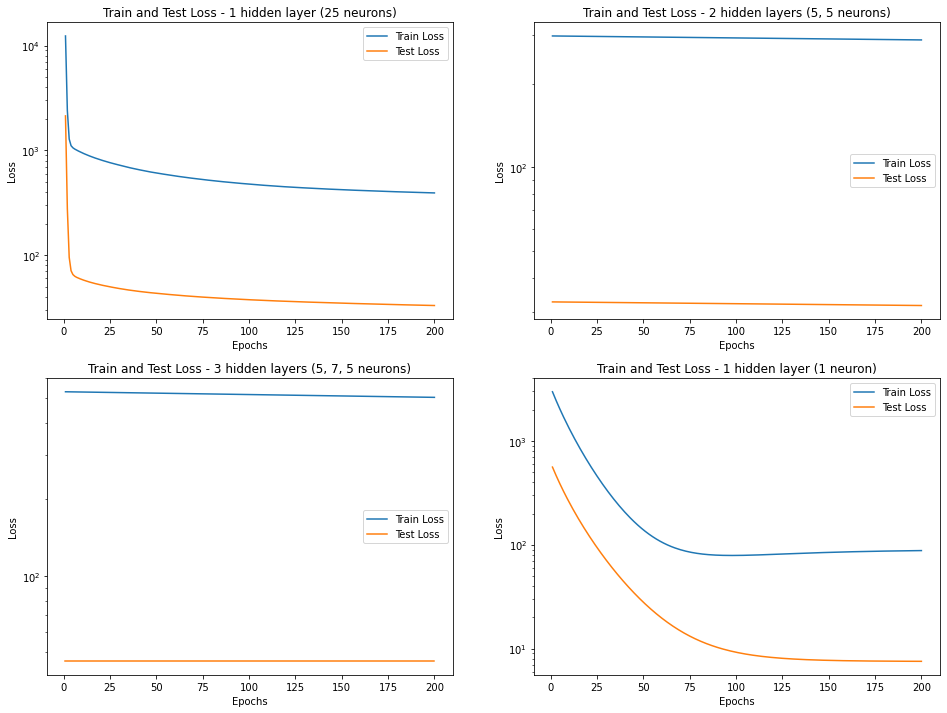

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
axs[0, 0].plot(range(1, len(train_losses_c1) + 1), train_losses_c1, label='Train Loss')
axs[0, 0].plot(range(1, len(test_losses_c1) + 1), test_losses_c1, label='Test Loss')
axs[0, 0].set_yscale('log')
axs[0, 0].set_xlabel('Epochs')
axs[0, 0].set_ylabel('Loss')
axs[0, 0].set_title('Train and Test Loss - 1 hidden layer (25 neurons)')
axs[0, 0].legend()

axs[0, 1].plot(range(1, len(train_losses_c2) + 1), train_losses_c2, label='Train Loss')
axs[0, 1].plot(range(1, len(test_losses_c2) + 1), test_losses_c2, label='Test Loss')
axs[0, 1].set_yscale('log')
axs[0, 1].set_xlabel('Epochs')
axs[0, 1].set_ylabel('Loss')
axs[0, 1].set_title('Train and Test Loss - 2 hidden layers (5, 5 neurons)')
axs[0, 1].legend()

axs[1, 0].plot(range(1, len(train_losses_c3) + 1), train_losses_c3, label='Train Loss')
axs[1, 0].plot(range(1, len(test_losses_c3) + 1), test_losses_c3, label='Test Loss')
axs[1, 0].set_yscale('log')
axs[1, 0].set_xlabel('Epochs')
axs[1, 0].set_ylabel('Loss')
axs[1, 0].set_title('Train and Test Loss - 3 hidden layers (5, 7, 5 neurons)')
axs[1, 0].legend()

axs[1, 1].plot(range(1, len(train_losses_c4) + 1), train_losses_c4, label='Train Loss')
axs[1, 1].plot(range(1, len(test_losses_c4) + 1), test_losses_c4, label='Test Loss')
axs[1, 1].set_yscale('log')
axs[1, 1].set_xlabel('Epochs')
axs[1, 1].set_ylabel('Loss')
axs[1, 1].set_title('Train and Test Loss - 1 hidden layer (1 neuron)')
axs[1, 1].legend()

plt.show()

### d)
Utilizando el set de desarrollo y la metodología de cross-validation, seleccionar los hiperparámetros de la red. Para esto puede usar el algoritmo de gradiente descendiente que usted desee (normalmente, uno querrá usar el optimizador que mejor resultado le haya dado, en cuanto a performance del modelo entrenado y el tiempo de convergencia).

**Sugerencia:** si bien uno puede hacer una búsqueda exhaustiva sobre el espacio de hiperparámetros $L$ y $M^{(l)}$, esto puede resultar computacionalmente demasiado costoso, debido a que para cada combinación y cada fold, se de debe re-entrenar el modelo y evaluarlo. Piense si hay alguna manera de recorrer el espacio de búsqueda con menor costo computacional. Además, recuerde que dados dos modelos de performance similar, se privilegia elegir el de menor complejidad (menor cantidad de parámetros), porque tenderá a tener menor varianza en el error predictivo sobre data sets “nuevos” (es decir, que no hayan sido usados para el deasrrollo del modelo).


Va a tardar aprox 4hs en correr así como está

In [21]:
numbers = [5, 25, 50, 100]
lay_1 = [[X_train.shape[1], i, 1] for i in numbers]
lay_2 = [[X_train.shape[1], i//2, i//2, 1] for i in numbers]
lay_3 = [[X_train.shape[1], i//4, i//2, i//4, 1] for i in numbers]

# build table of hiperparameters to test
hiperparameters = {
    'layers': [*lay_1, *lay_2, *lay_3],
    'alpha': [1e-5, 1e-6, 1e-9],
    'mini_batch_size': [6, 20, 40]
}

# create a list of all possible combinations of hiperparameters
all_combinations = list(itertools.product(*hiperparameters.values()))
print(len(all_combinations))
all_combinations


# Define the number of folds for cross-validation
k_folds = 5

# Shuffle the dataset indices
indices = np.arange(len(X))
np.random.shuffle(indices)

# Split the dataset into k folds
fold_size = len(indices) // k_folds
folds = [indices[i:i+fold_size] for i in range(0, len(indices), fold_size)]


# Perform k-fold cross-validation
for combination in all_combinations:
    print(f"\nCombination: {combination}")
    # Unpack the hyperparameters
    layers, alpha, mini_batch_size = combination
    
    # Initialize lists to store evaluation results for each fold
    fold_train_losses = []
    fold_test_losses = []
    
    for fold_num, fold_indices in enumerate(folds):
        # print(f"Fold {fold_num + 1}:")

        # Extract train and test indices
        train_indices = np.concatenate([folds[i] for i in range(k_folds) if i != fold_num])
        test_indices = fold_indices

        # Prepare train and test data
        X_train_fold = X.iloc[train_indices]
        y_train_fold = y[train_indices]
        X_test_fold = X.iloc[test_indices]
        y_test_fold = y[test_indices]

        # print(f"Train size: {X_train_fold.shape[1]}")
        # Train the model with the current hyperparameters
        nn = MLP(input_size=X_train_fold.shape[1], layers=layers) 
        # print(f"Layers: {nn.layers}, Alpha: {alpha}, Mini Batch Size: {mini_batch_size}, len: {len(nn.layers)} = num_layers: {nn.num_layers}, activations: {nn.activations}")
        train_losses, test_losses = nn.fit(list(zip(X_train_fold.values, y_train_fold)), 
                                            list(zip(X_test_fold.values, y_test_fold)),
                                            mini_batch_size, 
                                            max_epochs=200, 
                                            alpha=alpha)
        
        # Evaluate the model on the current fold
        train_loss = train_losses[-1]
        test_loss = test_losses[-1]
        
        # Store the evaluation results
        fold_train_losses.append(train_loss)
        fold_test_losses.append(test_loss)
        
        # Print the evaluation results for the current fold
        # print(f"Fold {fold_num+1} - Train Loss: {train_loss}, Test Loss: {test_loss}")
    
    # Compute the average evaluation results across all folds for the current hyperparameter combination
    avg_train_loss = np.mean(fold_train_losses)
    avg_test_loss = np.mean(fold_test_losses)
    
    # Print the average evaluation results for the current hyperparameter combination
    print(f"\nAvg Train Loss: {avg_train_loss}, Avg Test Loss: {avg_test_loss}")


108

Combination: ([7, 5, 1], 1e-05, 6)


100%|██████████| 200/200 [00:10<00:00, 18.43it/s]



Avg Train Loss: 15.552705367639486, Avg Test Loss: 3.920484147474722

Combination: ([7, 5, 1], 1e-05, 20)


100%|██████████| 200/200 [00:10<00:00, 19.32it/s]



Avg Train Loss: 89.72422279280553, Avg Test Loss: 4.642760768524019

Combination: ([7, 5, 1], 1e-05, 40)


100%|██████████| 200/200 [00:10<00:00, 19.41it/s]



Avg Train Loss: 181.04542828311097, Avg Test Loss: 5.0406955533107105

Combination: ([7, 5, 1], 1e-06, 6)


100%|██████████| 200/200 [00:10<00:00, 18.56it/s]



Avg Train Loss: 25.07772807156375, Avg Test Loss: 5.29326177625195

Combination: ([7, 5, 1], 1e-06, 20)


100%|██████████| 200/200 [00:10<00:00, 19.19it/s]



Avg Train Loss: 583.4223967801114, Avg Test Loss: 35.41905959710778

Combination: ([7, 5, 1], 1e-06, 40)


100%|██████████| 200/200 [00:10<00:00, 19.60it/s]



Avg Train Loss: 1819.594283083452, Avg Test Loss: 44.296879643563805

Combination: ([7, 5, 1], 1e-09, 6)


100%|██████████| 200/200 [00:10<00:00, 18.68it/s]



Avg Train Loss: 300.41848732415383, Avg Test Loss: 46.57118127605746

Combination: ([7, 5, 1], 1e-09, 20)


100%|██████████| 200/200 [00:10<00:00, 19.28it/s]



Avg Train Loss: 1324.979295011487, Avg Test Loss: 46.57344152347742

Combination: ([7, 5, 1], 1e-09, 40)


100%|██████████| 200/200 [00:10<00:00, 19.60it/s]



Avg Train Loss: 2912.5313926631507, Avg Test Loss: 46.57384182632306

Combination: ([7, 25, 1], 1e-05, 6)


100%|██████████| 200/200 [00:12<00:00, 16.44it/s]



Avg Train Loss: 3.4753943142698462, Avg Test Loss: 2.133970290607894

Combination: ([7, 25, 1], 1e-05, 20)


100%|██████████| 200/200 [00:10<00:00, 18.87it/s]



Avg Train Loss: 69.34438151024227, Avg Test Loss: 3.927443699238703

Combination: ([7, 25, 1], 1e-05, 40)


100%|██████████| 200/200 [00:10<00:00, 19.10it/s]



Avg Train Loss: 328.0263646089845, Avg Test Loss: 8.05634951559447

Combination: ([7, 25, 1], 1e-06, 6)


100%|██████████| 200/200 [00:11<00:00, 18.16it/s]



Avg Train Loss: 68.1759207077593, Avg Test Loss: 13.393977375442114

Combination: ([7, 25, 1], 1e-06, 20)


100%|██████████| 200/200 [00:10<00:00, 18.95it/s]



Avg Train Loss: 475.0365793690552, Avg Test Loss: 26.021328451879725

Combination: ([7, 25, 1], 1e-06, 40)


100%|██████████| 200/200 [00:10<00:00, 19.12it/s]



Avg Train Loss: 1263.0460093451584, Avg Test Loss: 31.918021656261146

Combination: ([7, 25, 1], 1e-09, 6)


100%|██████████| 200/200 [00:11<00:00, 18.05it/s]



Avg Train Loss: 303.8080927945474, Avg Test Loss: 89.85254045164103

Combination: ([7, 25, 1], 1e-09, 20)


100%|██████████| 200/200 [00:10<00:00, 18.91it/s]



Avg Train Loss: 39574.98877830188, Avg Test Loss: 2210.0543384212233

Combination: ([7, 25, 1], 1e-09, 40)


100%|██████████| 200/200 [00:10<00:00, 18.79it/s]



Avg Train Loss: 392147.070246298, Avg Test Loss: 9209.95245756728

Combination: ([7, 50, 1], 1e-05, 6)


100%|██████████| 200/200 [00:11<00:00, 17.82it/s]



Avg Train Loss: 12.236644357962284, Avg Test Loss: 3.4693115232551976

Combination: ([7, 50, 1], 1e-05, 20)


100%|██████████| 200/200 [00:10<00:00, 18.63it/s]



Avg Train Loss: 54.89598040398427, Avg Test Loss: 3.4262134281560797

Combination: ([7, 50, 1], 1e-05, 40)


100%|██████████| 200/200 [00:10<00:00, 18.58it/s]



Avg Train Loss: 191.5071762249102, Avg Test Loss: 4.063517385142096

Combination: ([7, 50, 1], 1e-06, 6)


100%|██████████| 200/200 [00:11<00:00, 17.87it/s]



Avg Train Loss: 12.614739744445526, Avg Test Loss: 4.664674869145036

Combination: ([7, 50, 1], 1e-06, 20)


100%|██████████| 200/200 [00:10<00:00, 18.57it/s]



Avg Train Loss: 274.7442148886448, Avg Test Loss: 12.033451020932855

Combination: ([7, 50, 1], 1e-06, 40)


100%|██████████| 200/200 [00:10<00:00, 18.90it/s]



Avg Train Loss: 835.2574855866011, Avg Test Loss: 19.345536151826956

Combination: ([7, 50, 1], 1e-09, 6)


100%|██████████| 200/200 [00:11<00:00, 17.94it/s]



Avg Train Loss: 3784.754248118069, Avg Test Loss: 1001.6348466047426

Combination: ([7, 50, 1], 1e-09, 20)


100%|██████████| 200/200 [00:10<00:00, 18.67it/s]



Avg Train Loss: 64083.94236868499, Avg Test Loss: 525.2224314309726

Combination: ([7, 50, 1], 1e-09, 40)


100%|██████████| 200/200 [00:10<00:00, 18.59it/s]



Avg Train Loss: 902261.7253225613, Avg Test Loss: 140.37873268618486

Combination: ([7, 100, 1], 1e-05, 6)


100%|██████████| 200/200 [00:11<00:00, 17.59it/s]



Avg Train Loss: 12.829816201738485, Avg Test Loss: 3.2872065536375965

Combination: ([7, 100, 1], 1e-05, 20)


100%|██████████| 200/200 [00:11<00:00, 18.04it/s]



Avg Train Loss: 83.74801697692132, Avg Test Loss: 4.942902128061016

Combination: ([7, 100, 1], 1e-05, 40)


100%|██████████| 200/200 [00:10<00:00, 18.35it/s]



Avg Train Loss: 310.77905331515416, Avg Test Loss: 8.756957929928975

Combination: ([7, 100, 1], 1e-06, 6)


100%|██████████| 200/200 [00:11<00:00, 17.43it/s]



Avg Train Loss: 14.347130977950698, Avg Test Loss: 12.40804022576164

Combination: ([7, 100, 1], 1e-06, 20)


100%|██████████| 200/200 [00:11<00:00, 17.97it/s]



Avg Train Loss: 657.7492022841832, Avg Test Loss: 25.271979138139663

Combination: ([7, 100, 1], 1e-06, 40)


100%|██████████| 200/200 [00:11<00:00, 16.88it/s]



Avg Train Loss: 1818.1223444588304, Avg Test Loss: 36.171940889827724

Combination: ([7, 100, 1], 1e-09, 6)


100%|██████████| 200/200 [00:11<00:00, 17.55it/s]



Avg Train Loss: 1860.8978418238999, Avg Test Loss: 891.4490955610623

Combination: ([7, 100, 1], 1e-09, 20)


100%|██████████| 200/200 [00:10<00:00, 18.19it/s]



Avg Train Loss: 26385.631155890733, Avg Test Loss: 1229.4284207525302

Combination: ([7, 100, 1], 1e-09, 40)


100%|██████████| 200/200 [00:10<00:00, 18.44it/s]



Avg Train Loss: 122374.23456696293, Avg Test Loss: 3167.1295919077515

Combination: ([7, 2, 2, 1], 1e-05, 6)


100%|██████████| 200/200 [00:14<00:00, 13.83it/s]



Avg Train Loss: 17.31605384212962, Avg Test Loss: 5.098690611164036

Combination: ([7, 2, 2, 1], 1e-05, 20)


100%|██████████| 200/200 [00:13<00:00, 14.30it/s]



Avg Train Loss: 555.2416222256034, Avg Test Loss: 35.68149892926864

Combination: ([7, 2, 2, 1], 1e-05, 40)


100%|██████████| 200/200 [00:14<00:00, 13.41it/s]



Avg Train Loss: 1840.695227318367, Avg Test Loss: 45.89604984619909

Combination: ([7, 2, 2, 1], 1e-06, 6)


100%|██████████| 200/200 [00:14<00:00, 13.79it/s]



Avg Train Loss: 184.22657828554534, Avg Test Loss: 46.502627070259464

Combination: ([7, 2, 2, 1], 1e-06, 20)


100%|██████████| 200/200 [00:13<00:00, 14.46it/s]



Avg Train Loss: 1109.128882583378, Avg Test Loss: 46.58063369115145

Combination: ([7, 2, 2, 1], 1e-06, 40)


100%|██████████| 200/200 [00:13<00:00, 14.46it/s]



Avg Train Loss: 2718.920395773101, Avg Test Loss: 46.58063369115145

Combination: ([7, 2, 2, 1], 1e-09, 6)


100%|██████████| 200/200 [00:14<00:00, 13.83it/s]



Avg Train Loss: 261.11088964723376, Avg Test Loss: 46.58063369115145

Combination: ([7, 2, 2, 1], 1e-09, 20)


100%|██████████| 200/200 [00:13<00:00, 14.37it/s]



Avg Train Loss: 4559.689935598678, Avg Test Loss: 46.58063369115145

Combination: ([7, 2, 2, 1], 1e-09, 40)


100%|██████████| 200/200 [00:13<00:00, 14.49it/s]



Avg Train Loss: 9945.083870127204, Avg Test Loss: 46.58063369115145

Combination: ([7, 12, 12, 1], 1e-05, 6)


100%|██████████| 200/200 [00:14<00:00, 13.51it/s]



Avg Train Loss: 67.47891207729046, Avg Test Loss: 22.186192873040802

Combination: ([7, 12, 12, 1], 1e-05, 20)


100%|██████████| 200/200 [00:14<00:00, 14.01it/s]



Avg Train Loss: 570.8627140136701, Avg Test Loss: 35.79379220865715

Combination: ([7, 12, 12, 1], 1e-05, 40)


100%|██████████| 200/200 [00:14<00:00, 14.05it/s]



Avg Train Loss: 1950.6298961733046, Avg Test Loss: 46.58063369115145

Combination: ([7, 12, 12, 1], 1e-06, 6)


100%|██████████| 200/200 [00:14<00:00, 13.40it/s]



Avg Train Loss: 11.404917907307912, Avg Test Loss: 2.504835234485193

Combination: ([7, 12, 12, 1], 1e-06, 20)


100%|██████████| 200/200 [00:14<00:00, 14.02it/s]



Avg Train Loss: 281.8165808666614, Avg Test Loss: 11.869823131236014

Combination: ([7, 12, 12, 1], 1e-06, 40)


100%|██████████| 200/200 [00:14<00:00, 14.09it/s]



Avg Train Loss: 754.3301984135387, Avg Test Loss: 23.429995353956524

Combination: ([7, 12, 12, 1], 1e-09, 6)


100%|██████████| 200/200 [00:14<00:00, 13.42it/s]



Avg Train Loss: 1766.7584034394881, Avg Test Loss: 362.9749422561978

Combination: ([7, 12, 12, 1], 1e-09, 20)


100%|██████████| 200/200 [00:14<00:00, 13.98it/s]



Avg Train Loss: 17626.456912578746, Avg Test Loss: 428.0050677130921

Combination: ([7, 12, 12, 1], 1e-09, 40)


100%|██████████| 200/200 [00:14<00:00, 13.91it/s]



Avg Train Loss: 36455.60477663429, Avg Test Loss: 322.0814786926961

Combination: ([7, 25, 25, 1], 1e-05, 6)


100%|██████████| 200/200 [00:15<00:00, 13.04it/s]



Avg Train Loss: 15.207351771992952, Avg Test Loss: 3.669817275052631

Combination: ([7, 25, 25, 1], 1e-05, 20)


100%|██████████| 200/200 [00:14<00:00, 13.52it/s]



Avg Train Loss: 86.08439840915977, Avg Test Loss: 4.078760236013079

Combination: ([7, 25, 25, 1], 1e-05, 40)


100%|██████████| 200/200 [00:14<00:00, 13.58it/s]



Avg Train Loss: 203.40306888026424, Avg Test Loss: 4.83794012891588

Combination: ([7, 25, 25, 1], 1e-06, 6)


100%|██████████| 200/200 [00:15<00:00, 13.03it/s]



Avg Train Loss: 6.12754161553287, Avg Test Loss: 3.8933354943618923

Combination: ([7, 25, 25, 1], 1e-06, 20)


100%|██████████| 200/200 [00:14<00:00, 13.54it/s]



Avg Train Loss: 80.97129957313959, Avg Test Loss: 6.20677365072447

Combination: ([7, 25, 25, 1], 1e-06, 40)


100%|██████████| 200/200 [00:14<00:00, 13.58it/s]



Avg Train Loss: 483.2794839747318, Avg Test Loss: 9.109965859138267

Combination: ([7, 25, 25, 1], 1e-09, 6)


100%|██████████| 200/200 [00:15<00:00, 12.99it/s]



Avg Train Loss: 3093.4316863109075, Avg Test Loss: 229.3901859143266

Combination: ([7, 25, 25, 1], 1e-09, 20)


100%|██████████| 200/200 [00:14<00:00, 13.36it/s]



Avg Train Loss: 67961.19493821454, Avg Test Loss: 526.4268845112953

Combination: ([7, 25, 25, 1], 1e-09, 40)


100%|██████████| 200/200 [00:14<00:00, 13.63it/s]



Avg Train Loss: 142146.0202336017, Avg Test Loss: 680.2113934516519

Combination: ([7, 50, 50, 1], 1e-05, 6)


100%|██████████| 200/200 [00:16<00:00, 12.13it/s]



Avg Train Loss: 8.245396745522436e+58, Avg Test Loss: 2.0613079596030158e+58

Combination: ([7, 50, 50, 1], 1e-05, 20)


  0%|          | 0/200 [00:00<?, ?it/s]/Users/maxi/Downloads/Actuales/ML/ML-TP2/Problema 3/functions3.py:163: RuntimeWarning: invalid value encountered in multiply
  d[l-1] = np.dot(self.weights[l].T, d[l]) * h_deriv(a[l-1])
/Users/maxi/Downloads/Actuales/ML/ML-TP2/Problema 3/functions3.py:101: RuntimeWarning: overflow encountered in square
  return np.mean((a_out - y) ** 2)
100%|██████████| 200/200 [00:15<00:00, 12.63it/s]



Avg Train Loss: nan, Avg Test Loss: nan

Combination: ([7, 50, 50, 1], 1e-05, 40)


100%|██████████| 200/200 [00:15<00:00, 12.73it/s]



Avg Train Loss: nan, Avg Test Loss: nan

Combination: ([7, 50, 50, 1], 1e-06, 6)


100%|██████████| 200/200 [00:16<00:00, 12.14it/s]



Avg Train Loss: 16.760214810585346, Avg Test Loss: 9.179744467418377

Combination: ([7, 50, 50, 1], 1e-06, 20)


100%|██████████| 200/200 [00:15<00:00, 12.61it/s]



Avg Train Loss: 218.72930403032078, Avg Test Loss: 15.952817682424822

Combination: ([7, 50, 50, 1], 1e-06, 40)


100%|██████████| 200/200 [00:15<00:00, 12.83it/s]



Avg Train Loss: 807.8224800864946, Avg Test Loss: 21.91229606394649

Combination: ([7, 50, 50, 1], 1e-09, 6)


100%|██████████| 200/200 [00:16<00:00, 12.21it/s]



Avg Train Loss: 2158.4420797193357, Avg Test Loss: 287.0620833249709

Combination: ([7, 50, 50, 1], 1e-09, 20)


100%|██████████| 200/200 [00:15<00:00, 12.65it/s]



Avg Train Loss: 34100.76344426611, Avg Test Loss: 596.6589673413055

Combination: ([7, 50, 50, 1], 1e-09, 40)


100%|██████████| 200/200 [00:15<00:00, 12.82it/s]



Avg Train Loss: 123370.09788790857, Avg Test Loss: 823.0239761231387

Combination: ([7, 1, 2, 1, 1], 1e-05, 6)


100%|██████████| 200/200 [00:18<00:00, 10.93it/s]



Avg Train Loss: 77.54130594174308, Avg Test Loss: 25.167193149128217

Combination: ([7, 1, 2, 1, 1], 1e-05, 20)


100%|██████████| 200/200 [00:17<00:00, 11.50it/s]



Avg Train Loss: 657.0971066222608, Avg Test Loss: 40.94552542340519

Combination: ([7, 1, 2, 1, 1], 1e-05, 40)


100%|██████████| 200/200 [00:17<00:00, 11.51it/s]



Avg Train Loss: 1903.4158780944254, Avg Test Loss: 46.131941855858244

Combination: ([7, 1, 2, 1, 1], 1e-06, 6)


100%|██████████| 200/200 [00:18<00:00, 11.10it/s]



Avg Train Loss: 179.56009495426648, Avg Test Loss: 46.48809376515453

Combination: ([7, 1, 2, 1, 1], 1e-06, 20)


100%|██████████| 200/200 [00:17<00:00, 11.38it/s]



Avg Train Loss: 1015.9366353396806, Avg Test Loss: 46.58063369115145

Combination: ([7, 1, 2, 1, 1], 1e-06, 40)


100%|██████████| 200/200 [00:17<00:00, 11.57it/s]



Avg Train Loss: 2481.6217461475144, Avg Test Loss: 46.58063369115145

Combination: ([7, 1, 2, 1, 1], 1e-09, 6)


100%|██████████| 200/200 [00:18<00:00, 11.09it/s]



Avg Train Loss: 226.37097957897777, Avg Test Loss: 46.58063369115145

Combination: ([7, 1, 2, 1, 1], 1e-09, 20)


100%|██████████| 200/200 [00:17<00:00, 11.50it/s]



Avg Train Loss: 1110.4302729974693, Avg Test Loss: 46.58063369115145

Combination: ([7, 1, 2, 1, 1], 1e-09, 40)


100%|██████████| 200/200 [00:17<00:00, 11.65it/s]



Avg Train Loss: 2586.5554962138312, Avg Test Loss: 46.58063369115145

Combination: ([7, 6, 12, 6, 1], 1e-05, 6)


100%|██████████| 200/200 [00:18<00:00, 10.84it/s]



Avg Train Loss: 8.500828497044644, Avg Test Loss: 2.693422378225327

Combination: ([7, 6, 12, 6, 1], 1e-05, 20)


100%|██████████| 200/200 [00:17<00:00, 11.32it/s]



Avg Train Loss: 140.87280477939618, Avg Test Loss: 6.933923518795001

Combination: ([7, 6, 12, 6, 1], 1e-05, 40)


100%|██████████| 200/200 [00:17<00:00, 11.39it/s]



Avg Train Loss: 354.1478347260762, Avg Test Loss: 9.818295982732895

Combination: ([7, 6, 12, 6, 1], 1e-06, 6)


100%|██████████| 200/200 [00:18<00:00, 10.81it/s]



Avg Train Loss: 9.47471912085741, Avg Test Loss: 10.734333557982415

Combination: ([7, 6, 12, 6, 1], 1e-06, 20)


100%|██████████| 200/200 [00:17<00:00, 11.29it/s]



Avg Train Loss: 193.8270355844157, Avg Test Loss: 13.824786895657379

Combination: ([7, 6, 12, 6, 1], 1e-06, 40)


100%|██████████| 200/200 [00:17<00:00, 11.35it/s]



Avg Train Loss: 667.6186031844043, Avg Test Loss: 15.017277673036364

Combination: ([7, 6, 12, 6, 1], 1e-09, 6)


100%|██████████| 200/200 [00:18<00:00, 10.89it/s]



Avg Train Loss: 2023.8591857591114, Avg Test Loss: 119.70830182632884

Combination: ([7, 6, 12, 6, 1], 1e-09, 20)


100%|██████████| 200/200 [00:17<00:00, 11.33it/s]



Avg Train Loss: 14661.136199955432, Avg Test Loss: 339.9562920340515

Combination: ([7, 6, 12, 6, 1], 1e-09, 40)


100%|██████████| 200/200 [00:17<00:00, 11.41it/s]



Avg Train Loss: 35605.06467624641, Avg Test Loss: 499.56271880059387

Combination: ([7, 12, 25, 12, 1], 1e-05, 6)


100%|██████████| 200/200 [00:19<00:00, 10.46it/s]



Avg Train Loss: nan, Avg Test Loss: nan

Combination: ([7, 12, 25, 12, 1], 1e-05, 20)


100%|██████████| 200/200 [00:18<00:00, 10.76it/s]



Avg Train Loss: nan, Avg Test Loss: nan

Combination: ([7, 12, 25, 12, 1], 1e-05, 40)


100%|██████████| 200/200 [00:18<00:00, 10.85it/s]



Avg Train Loss: nan, Avg Test Loss: nan

Combination: ([7, 12, 25, 12, 1], 1e-06, 6)


100%|██████████| 200/200 [00:19<00:00, 10.47it/s]



Avg Train Loss: 14.774878072324322, Avg Test Loss: 6.90506357750412

Combination: ([7, 12, 25, 12, 1], 1e-06, 20)


100%|██████████| 200/200 [00:18<00:00, 10.90it/s]



Avg Train Loss: 256.42419920339955, Avg Test Loss: 11.78149626824144

Combination: ([7, 12, 25, 12, 1], 1e-06, 40)


100%|██████████| 200/200 [00:18<00:00, 10.99it/s]



Avg Train Loss: 985.7331658473544, Avg Test Loss: 19.182946347165036

Combination: ([7, 12, 25, 12, 1], 1e-09, 6)


100%|██████████| 200/200 [00:19<00:00, 10.48it/s]



Avg Train Loss: 13933.504092898118, Avg Test Loss: 926.2070955764373

Combination: ([7, 12, 25, 12, 1], 1e-09, 20)


100%|██████████| 200/200 [00:18<00:00, 10.87it/s]



Avg Train Loss: 96564.69928261456, Avg Test Loss: 1640.5777970557497

Combination: ([7, 12, 25, 12, 1], 1e-09, 40)


100%|██████████| 200/200 [00:18<00:00, 10.95it/s]



Avg Train Loss: 197499.73440855104, Avg Test Loss: 1891.6119760481129

Combination: ([7, 25, 50, 25, 1], 1e-05, 6)


100%|██████████| 200/200 [00:20<00:00,  9.65it/s]



Avg Train Loss: nan, Avg Test Loss: nan

Combination: ([7, 25, 50, 25, 1], 1e-05, 20)


100%|██████████| 200/200 [00:19<00:00, 10.15it/s]



Avg Train Loss: nan, Avg Test Loss: nan

Combination: ([7, 25, 50, 25, 1], 1e-05, 40)


100%|██████████| 200/200 [00:19<00:00, 10.29it/s]



Avg Train Loss: nan, Avg Test Loss: nan

Combination: ([7, 25, 50, 25, 1], 1e-06, 6)


100%|██████████| 200/200 [00:20<00:00,  9.61it/s]



Avg Train Loss: nan, Avg Test Loss: nan

Combination: ([7, 25, 50, 25, 1], 1e-06, 20)


100%|██████████| 200/200 [00:19<00:00, 10.22it/s]



Avg Train Loss: nan, Avg Test Loss: nan

Combination: ([7, 25, 50, 25, 1], 1e-06, 40)


100%|██████████| 200/200 [00:19<00:00, 10.29it/s]



Avg Train Loss: nan, Avg Test Loss: nan

Combination: ([7, 25, 50, 25, 1], 1e-09, 6)


100%|██████████| 200/200 [00:20<00:00,  9.67it/s]



Avg Train Loss: 16588.288726838553, Avg Test Loss: 1722.2792851461363

Combination: ([7, 25, 50, 25, 1], 1e-09, 20)


100%|██████████| 200/200 [00:19<00:00, 10.24it/s]



Avg Train Loss: 215536.25339143834, Avg Test Loss: 4580.867977480329

Combination: ([7, 25, 50, 25, 1], 1e-09, 40)


100%|██████████| 200/200 [00:19<00:00, 10.27it/s]


Avg Train Loss: 613668.6164902423, Avg Test Loss: 6675.05294706825


In [ ]:
# train the optimum model, with the best hiperparamaters


### e)
Analizar la performance de su modelo final en términos de $RMSE$, $MAE$ y $R^2$, y graficar $\hat{y}$ vs. $y$ sobre los datos “held out” de los folds de cross-validaion. Compare esto con la performance del modelo de regresión lineal desarrollado en el problema anterior. ¿Cuál de los dos modelos cree usted que generalizará mejor? ¿Por qué?
